In [9]:
import pandas as pd
import numpy as np
import pickle
import pandas
from scipy.io import readsav
import pyreadstat

In [10]:
filepath_historical_data = '/Users/wdhakouani/code/MadMax1995bb/powder_alert2.0/raw_data/Hochfuegen_historyDS.csv'

In [22]:
filepath_hist_api = '/Users/wdhakouani/code/MadMax1995bb/powder_alert2.0/raw_data/historical_api.csv'

In [15]:
csv_file = filepath_historical_data
df_hist = pd.read_csv(csv_file)
df_hist.tail(10)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
402851,1733666400,2024-12-08 14:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.65,NaN,269.04,264.55,...,4.53,NaN,NaN,NaN,0.31,100,600,Snow,light snow,13d
402852,1733670000,2024-12-08 15:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.21,NaN,268.61,264.01,...,4.53,NaN,NaN,NaN,0.31,100,600,Snow,light snow,13d
402853,1733673600,2024-12-08 16:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.21,NaN,268.73,264.01,...,4.53,NaN,NaN,NaN,0.31,100,600,Snow,light snow,13n
402854,1733677200,2024-12-08 17:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.18,NaN,268.70,264.53,...,3.70,NaN,NaN,NaN,1.00,100,600,Snow,light snow,13n
402855,1733680800,2024-12-08 18:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.25,NaN,268.77,264.61,...,3.70,NaN,NaN,NaN,1.00,100,600,Snow,light snow,13n
402856,1733684400,2024-12-08 19:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.25,NaN,268.77,264.61,...,3.70,NaN,NaN,NaN,1.00,100,600,Snow,light snow,13n
402857,1733688000,2024-12-08 20:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.21,NaN,268.73,265.02,...,3.04,NaN,NaN,NaN,0.50,100,600,Snow,light snow,13n
402858,1733691600,2024-12-08 21:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,269.18,NaN,268.70,264.98,...,3.04,NaN,NaN,NaN,0.50,100,600,Snow,light snow,13n
402859,1733695200,2024-12-08 22:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,268.57,NaN,268.09,264.25,...,3.04,NaN,NaN,NaN,0.50,100,600,Snow,light snow,13n
402860,1733698800,2024-12-08 23:00:00 +0000 UTC,3600,Hochfügen,47.26759,11.77616,268.16,NaN,267.68,263.70,...,3.12,NaN,NaN,NaN,1.00,100,600,Snow,light snow,13n


In [33]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402861 entries, 0 to 402860
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   402861 non-null  int64  
 1   dt_iso               402861 non-null  object 
 2   timezone             402861 non-null  int64  
 3   city_name            402861 non-null  object 
 4   lat                  402861 non-null  float64
 5   lon                  402861 non-null  float64
 6   temp                 402861 non-null  float64
 7   visibility           4045 non-null    float64
 8   dew_point            402861 non-null  float64
 9   feels_like           402861 non-null  float64
 10  temp_min             402861 non-null  float64
 11  temp_max             402861 non-null  float64
 12  pressure             402861 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

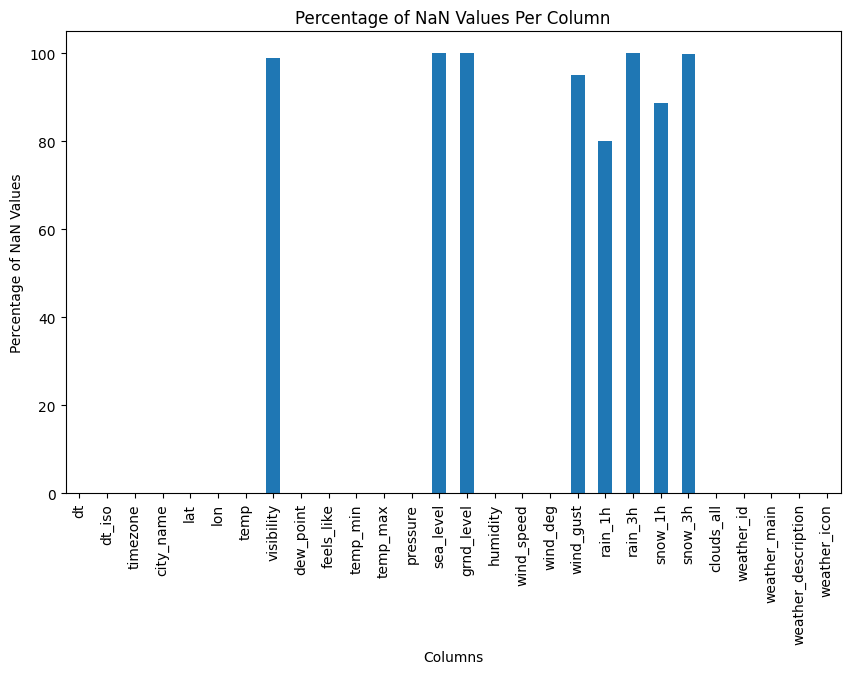

In [21]:
import matplotlib.pyplot as plt

nan_distribution = (df_hist.isna().sum() / len(df_hist)) * 100
nan_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of NaN Values Per Column')
plt.ylabel('Percentage of NaN Values')
plt.xlabel('Columns')
plt.show();

In [29]:
csv_file = filepath_hist_api
df_api = pd.read_csv(csv_file)
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402696 entries, 0 to 402695
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           402696 non-null  object 
 1   temperature_2m                 402673 non-null  float64
 2   relative_humidity_2m           402673 non-null  float64
 3   dew_point_2m                   402673 non-null  float64
 4   apparent_temperature           402673 non-null  float64
 5   precipitation                  402673 non-null  float64
 6   rain                           402673 non-null  float64
 7   snowfall                       402673 non-null  float64
 8   snow_depth                     402072 non-null  float64
 9   weather_code                   402673 non-null  float64
 10  pressure_msl                   402673 non-null  float64
 11  surface_pressure               402673 non-null  float64
 12  cloud_cover                   

In [32]:
df_api.tail(50)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
402646,2024-12-06 22:00:00+00:00,-1.901,77.859790,-5.251000,-4.843082,0.1,0.0,0.07,NaN,71.0,...,30.960001,-1.051,-0.651,1.199,6.349,0.302,0.284,0.258,0.385,0.0000
402647,2024-12-06 23:00:00+00:00,-2.801,78.907130,-5.951000,-5.760833,0.0,0.0,0.00,NaN,2.0,...,24.119999,-1.051,-0.651,1.199,6.349,0.302,0.284,0.258,0.385,0.0000
402648,2024-12-07 00:00:00+00:00,-5.201,80.689900,-8.001000,-8.744497,0.0,0.0,0.00,NaN,2.0,...,18.359999,-1.051,-0.651,1.199,6.349,0.302,0.284,0.258,0.385,0.0000
402649,2024-12-07 01:00:00+00:00,-3.651,71.530334,-8.051000,-7.296431,0.0,0.0,0.00,NaN,3.0,...,16.919998,-0.751,-0.651,1.199,6.349,0.302,0.284,0.258,0.385,0.0000
402650,2024-12-07 02:00:00+00:00,-5.101,69.848660,-9.750999,-8.967077,0.0,0.0,0.00,NaN,1.0,...,15.480000,-0.751,-0.651,1.199,6.349,0.302,0.284,0.258,0.385,0.0000
402651,2024-12-07 03:00:00+00:00,-8.201,68.068560,-13.051000,-12.300821,0.0,0.0,0.00,NaN,2.0,...,15.480000,-0.751,-0.651,1.199,6.349,0.302,0.284,0.258,0.384,0.0000
402652,2024-12-07 04:00:00+00:00,-9.451,61.920486,-15.401000,-13.766750,0.0,0.0,0.00,NaN,3.0,...,16.199999,-0.751,-0.651,1.199,6.349,0.302,0.284,0.258,0.384,0.0000
402653,2024-12-07 05:00:00+00:00,-10.601,53.637010,-18.201000,-15.130055,0.0,0.0,0.00,NaN,3.0,...,18.359999,-0.751,-0.651,1.199,6.299,0.302,0.284,0.258,0.384,0.0000
402654,2024-12-07 06:00:00+00:00,-11.151,44.838200,-20.801000,-15.809304,0.0,0.0,0.00,NaN,3.0,...,20.519999,-0.751,-0.651,1.199,6.299,0.302,0.284,0.258,0.384,0.0000
402655,2024-12-07 07:00:00+00:00,-10.951,38.542725,-22.351000,-15.633326,0.0,0.0,0.00,NaN,3.0,...,21.240000,-0.751,-0.651,1.199,6.299,0.302,0.284,0.258,0.384,0.0000


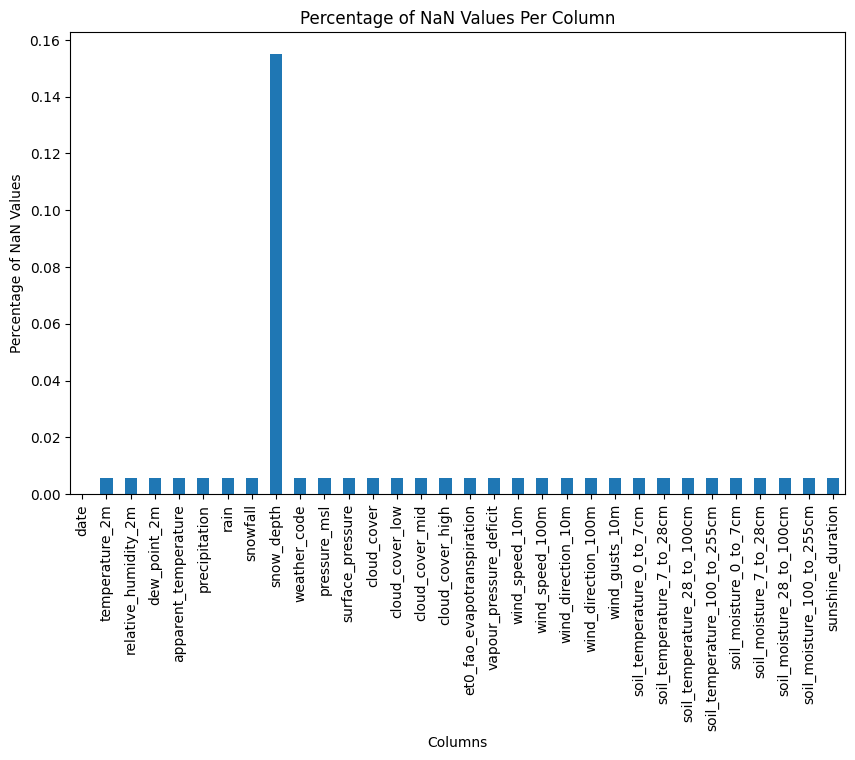

In [34]:
nan_distribution = (df_api.isna().sum() / len(df_api)) * 100
nan_distribution.plot(kind='bar', figsize=(10, 6), title='Percentage of NaN Values Per Column')
plt.ylabel('Percentage of NaN Values')
plt.xlabel('Columns')
plt.show();